In [1]:
# About Project: 
"""
In this project, our goal is to correctly predict whether a given individual makes a profit of greater than 50,000 
or less than 50,000 based on a set of attribute features which are already provided. 
So, with the data available we can come to conclusion that an individual can be a donor or not.
"""

'\nIn this project, our goal is to correctly predict whether a given individual makes a profit of greater than 50,000 \nor less than 50,000 based on a set of attribute features which are already provided. \nSo, with the data available we can come to conclusion that an individual can be a donor or not.\n'

In [2]:
# Where it can be used?
"""
This model can help non-profit organizations which certainly depends on donation to correctly predict the donation 
that the organization has to request an individual based on the individual records.
"""

'\nThis model can help non-profit organizations which certainly depends on donation to correctly predict the donation \nthat the organization has to request an individual based on the individual records.\n'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Python libraries and modules required
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

In [5]:
# Python libraries to visualize the data
import visuals as vs
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Pretty display for notebooks
%matplotlib inline

In [7]:
# Load the adult income dataset
data = pd.read_csv("adult_income.csv")

In [8]:
# Display the sample data - records
display(data.head(n=3))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


In [9]:
# Target variable = "income"

In [10]:
# Information about features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [11]:
# Total count of records
n_total = len(data)

# Count of records where individual's income is greater than $50,000
n_gt_50k = len(data[data['income'] == '>50K'])

# Count of records where individual's income is less than or equals to $50,000
n_le_50k = len(data[data['income'] == '<=50K'])

# Percentage of individuals whose income is greater than $50,000
p_gt_50k = 100 * n_gt_50k / n_total

# Print the results
print("Total number of records                              = {}".format(n_total))
print("Individuals making more than $50,000                 = {}".format(n_gt_50k))
print("Individuals making at most $50,000                   = {}".format(n_le_50k))
print("Percentage of individuals making more than $50,000   = {:.2f}%".format(p_gt_50k))

Total number of records                              = 45222
Individuals making more than $50,000                 = 11208
Individuals making at most $50,000                   = 34014
Percentage of individuals making more than $50,000   = 24.78%


In [12]:
# Data preprocessing

In [13]:
# Data splitting : Features and Target variable
raw_income = data['income']
raw_features = data.drop('income', axis = 1)

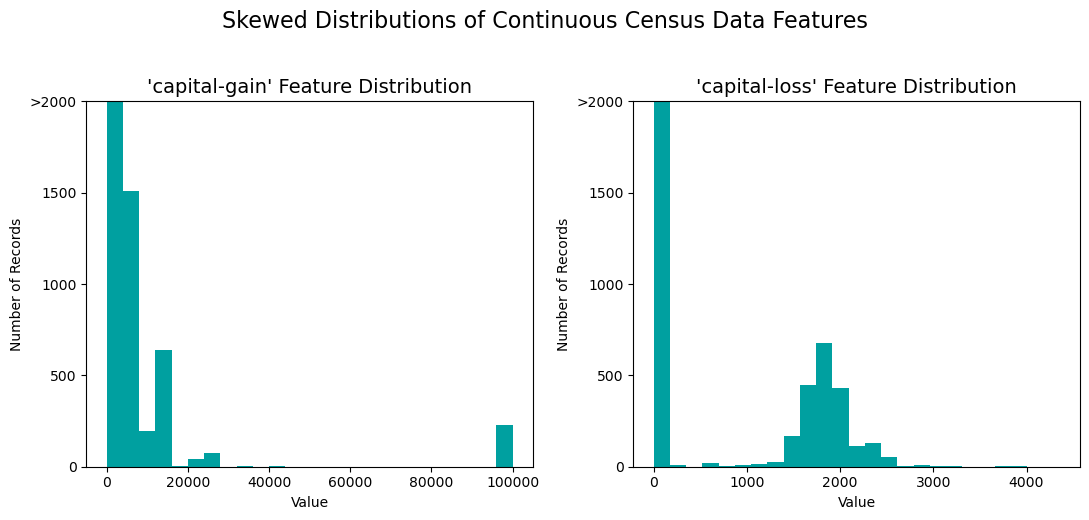

In [14]:
# Visualize skewed continuous features of data
vs.distribution(data)

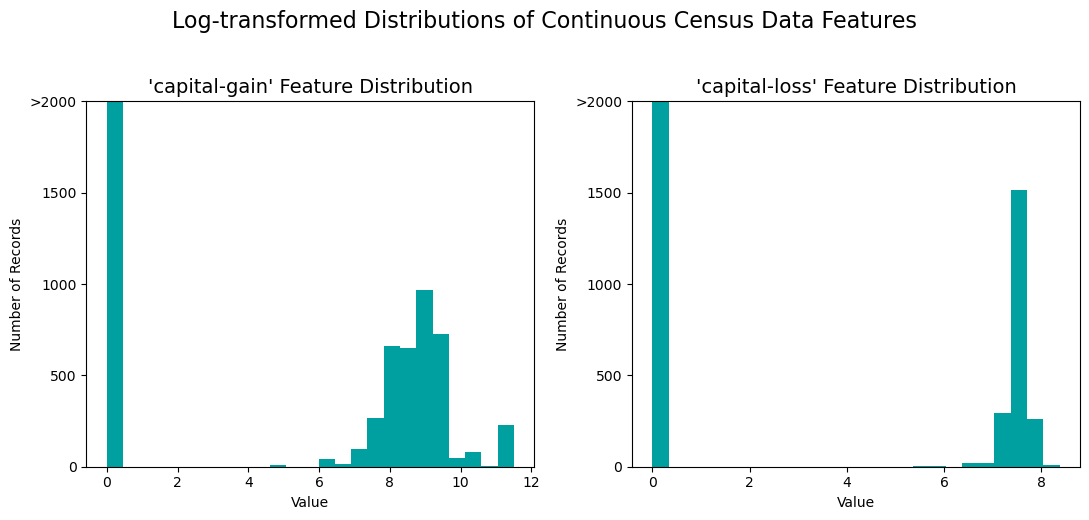

In [15]:
# Log transform the skewed features
skewed = ['capital-gain', 'capital-loss']
raw_features[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(raw_features, transformed = True)

In [16]:
# Normalizing features(numericals)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
raw_features[numerical] = scaler.fit_transform(data[numerical])

In [17]:
# Features data after normalization
display(raw_features.head(n = 3))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States


In [18]:
# One-hot encoding
features = pd.get_dummies(raw_features)

# Encode the 'raw_income' data to numerical values
income = raw_income.apply(lambda x: 1 if x == '>50K' else 0)

# Print the number of features after one-hot encoding
encoded_features = list(features.columns)
print("Total features after one-hot encoding = {}".format(len(encoded_features)))

Total features after one-hot encoding = 103


In [19]:
# List of features encoded
for feature in encoded_features:
    print(feature)

age
education-num
capital-gain
capital-loss
hours-per-week
workclass_ Federal-gov
workclass_ Local-gov
workclass_ Private
workclass_ Self-emp-inc
workclass_ Self-emp-not-inc
workclass_ State-gov
workclass_ Without-pay
education_level_ 10th
education_level_ 11th
education_level_ 12th
education_level_ 1st-4th
education_level_ 5th-6th
education_level_ 7th-8th
education_level_ 9th
education_level_ Assoc-acdm
education_level_ Assoc-voc
education_level_ Bachelors
education_level_ Doctorate
education_level_ HS-grad
education_level_ Masters
education_level_ Preschool
education_level_ Prof-school
education_level_ Some-college
marital-status_ Divorced
marital-status_ Married-AF-spouse
marital-status_ Married-civ-spouse
marital-status_ Married-spouse-absent
marital-status_ Never-married
marital-status_ Separated
marital-status_ Widowed
occupation_ Adm-clerical
occupation_ Armed-Forces
occupation_ Craft-repair
occupation_ Exec-managerial
occupation_ Farming-fishing
occupation_ Handlers-cleaners
oc

In [20]:
display(features.head(n=5))

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.02174,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.00000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Data splitting: Train data and Test data
from sklearn.model_selection import train_test_split

# Splitting ratio = (train : test) = (80 : 20) [X - features; Y - target variable]
X_train, X_test, Y_train, Y_test = train_test_split(features, income, test_size = 0.20, random_state = 0)

# Split details
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


In [22]:
# Calculate naive predictor perforamance
TP = np.sum(income) 
FP = income.count() - TP
# As considired naive case, no negative predictions
TN = 0 
FN = 0 

# Calculate accuracy, precision and recall
accuracy = (TP + TN) / (TP + FP + TN + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# Calculate F-score
l_rate = 0.5
fscore = (1 + l_rate**2) * ((precision * recall) / ((l_rate**2) * precision + recall))

# Results
print("-------------------------\nNaive Predictor: \n-------------------------\nRecall          =  {:.3f}\nPrecision       =  {:.3f}\nAccuracy score  =  {:.3f}\nF-score         =  {:.3f}\n-------------------------".format(recall, precision, accuracy, fscore))

-------------------------
Naive Predictor: 
-------------------------
Recall          =  1.000
Precision       =  0.248
Accuracy score  =  0.248
F-score         =  0.292
-------------------------


In [23]:
# Importing fbeta score and accuracy score from sklearn
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, Y_train, X_test, Y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - Y_train: income training set
       - X_test: features testing set
       - Y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data with 'sample_size'
    start = time() 
    learner = learner.fit(X_train[:sample_size],Y_train[:sample_size])
    end = time() 
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set, then get predictions on the first 300 training samples
    start = time() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time()
    
    # Calculate the total prediction time, accuracy and F-Score on the first 300 training samples and test set
    results['pred_time'] = end - start
    results['acc_train'] = accuracy_score(Y_train[:300],predictions_train)        
    results['acc_test'] = accuracy_score(Y_test,predictions_test)
    results['f_train'] = fbeta_score(Y_train[:300],predictions_train,beta=0.5)
    results['f_test'] = fbeta_score(Y_test,predictions_test,beta=0.5)
       
    # Mini batches
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [24]:
"""
Supervised algorithms used in learning:
1) Logistic regression
2) K-Nearest Neighbours
"""
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR

In [25]:
# Assign learners
learner_1 = LR(random_state=42)
learner_2 = KNN(n_neighbors=7)

In [26]:
# Divide the batch samples into three types of batches
samples_100 = len(Y_train)
samples_10 = int(len(Y_train)/10)
samples_1 = int(len(Y_train)/100)

In [27]:
# Collect results on the learners
results = {}
for learner in [learner_1, learner_2]:
    learner_name = learner.__class__.__name__
    results[learner_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[learner_name][i] = \
        train_predict(learner, samples, X_train, Y_train, X_test, Y_test)

LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


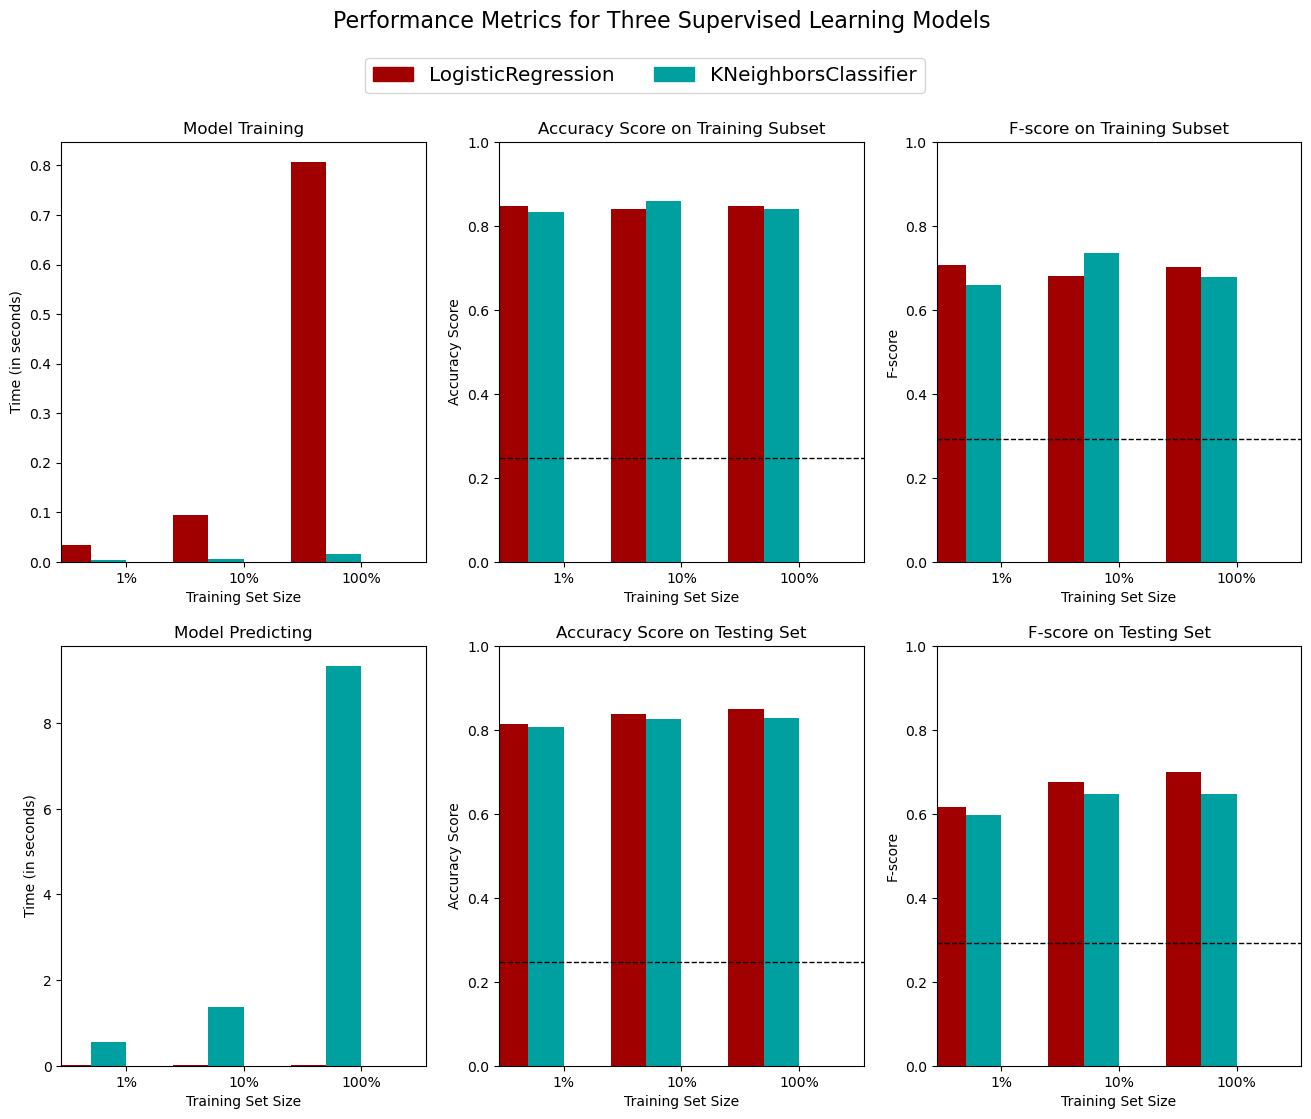

In [28]:
# Visualising the two supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [29]:
# Display the performance numericals of the two supervised learning models chosen
print("--------------------------------------------------")
for i in results.items():
    print(i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))
    print("--------------------------------------------------")

--------------------------------------------------
LogisticRegression


,1%,10%,100%
train_time,0.033606,0.094171,0.807500
pred_time,0.013996,0.015625,0.025444
acc_train,0.846667,0.840000,0.846667
acc_test,0.813488,0.837258,0.848425
f_train,0.705645,0.680147,0.700758
f_test,0.614996,0.675080,0.699715


--------------------------------------------------
KNeighborsClassifier


,1%,10%,100%
train_time,0.004001,0.005276,0.016021
pred_time,0.559746,1.372130,9.343067
acc_train,0.833333,0.860000,0.840000
acc_test,0.806523,0.826092,0.827197
f_train,0.657895,0.735294,0.677083
f_test,0.596412,0.647085,0.647970


--------------------------------------------------


In [30]:
# Visualizing the confusion matrix for each classifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

print("--------------------------------------------------")
for i,model in enumerate([learner_1,learner_2]):
    results = confusion_matrix(Y_test, model.predict(X_test))   
    print('Confusion matrix for model: {}'.format(model.__class__.__name__));
    print(results) 
    print('Accuracy Score :',accuracy_score(Y_test, model.predict(X_test)))
    print("--------------------------------------------------")


--------------------------------------------------
Confusion matrix for model: LogisticRegression
[[6350  490]
 [ 881 1324]]
Accuracy Score : 0.848424543946932
--------------------------------------------------
Confusion matrix for model: KNeighborsClassifier
[[6202  638]
 [ 925 1280]]
Accuracy Score : 0.8271973466003317
--------------------------------------------------


In [31]:
# Conclusion/Result:
"""
Based on the source data and machine learning algorithms we successfully completed training and testing model for 
finding donors using supervised learning has done with resulting accuracy score for both the models. 

Logostic Regression Accuracy Score = 0.85
K-Nearest Neighbor Accuracy Score = 0.83

And “Logistic regression” has the best accuracy score when compared to K-Nearest Neighbor algorithm accordingly 
to the data splitting.
"""

'\nBased on the source data and machine learning algorithms we successfully completed training and testing model for \nfinding donors using supervised learning has done with resulting accuracy score for both the models. \n\nLogostic Regression Accuracy Score = 0.85\nK-Nearest Neighbor Accuracy Score = 0.83\n\nAnd “Logistic regression” has the best accuracy score when compared to K-Nearest Neighbor algorithm accordingly \nto the data splitting.\n'